Student Name: Chenwei Zhu

Student Number: 1006003619

# **Data Prepare**

In [1]:
# Link to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import pkg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# define file path
file_path = '/content/drive/My Drive/INF2178/A1/INF2178_A1_data.xlsx'
# read the data file into a DataFrame
df = pd.read_excel(file_path)

In [4]:
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


# **Data Summary**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [6]:
# check missing values by capacity type
missing_values_capacity_type = df.groupby('CAPACITY_TYPE')[['PROGRAM_MODEL', 'SERVICE_USER_COUNT',
                                                                'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS',
                                                                'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']].apply(lambda x: x.isnull().sum())
missing_values_capacity_type


,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
CAPACITY_TYPE,,,,,,
Bed Based Capacity,2,0,0,0,32399,32399
Room Based Capacity,0,0,18545,18545,0,0


In [7]:
df = df.dropna(subset=['PROGRAM_MODEL']) # drop n/a
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [8]:
# Calculate the occupied rate,sperate by capacity type
df['ROOM_OCCUPIED_RATE'] = df['OCCUPIED_ROOMS']/ df['CAPACITY_ACTUAL_ROOM']
df['BED_OCCUPIED_RATE'] =df['OCCUPIED_BEDS']/ df['CAPACITY_ACTUAL_BED']
df.head()

<ipython-input-8-29ef6815452d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROOM_OCCUPIED_RATE'] = df['OCCUPIED_ROOMS']/ df['CAPACITY_ACTUAL_ROOM']
<ipython-input-8-29ef6815452d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BED_OCCUPIED_RATE'] =df['OCCUPIED_BEDS']/ df['CAPACITY_ACTUAL_BED']


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,ROOM_OCCUPIED_RATE,BED_OCCUPIED_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,0.896552,NaN
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1.000000,NaN
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429,NaN
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1.000000,NaN
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571,NaN


## **Exploratory Data Analysis (EDA)**


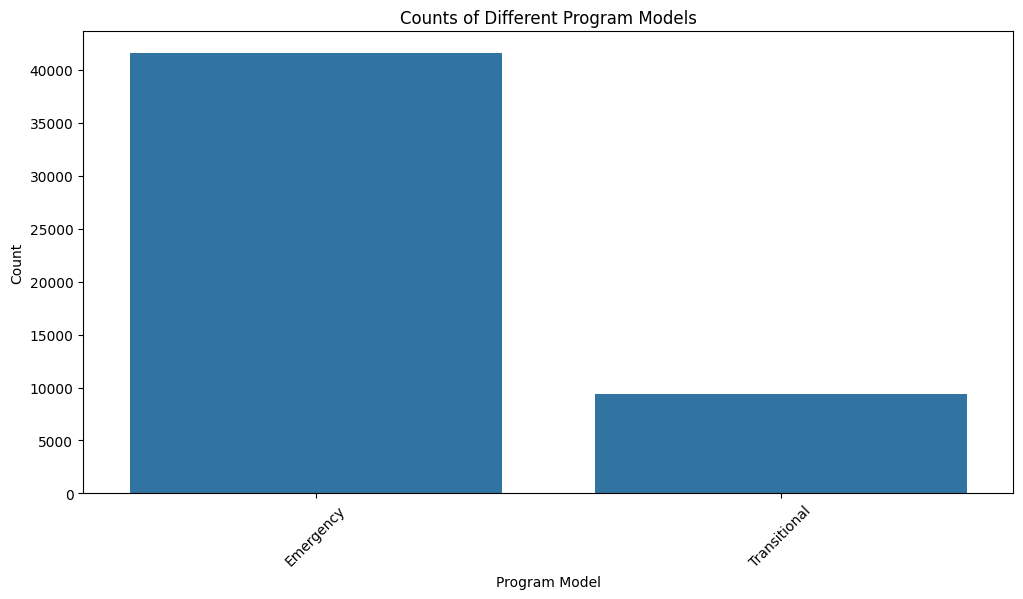

In [9]:
# Program Model Counts
plt.figure(figsize=(12, 6))
sns.countplot(x='PROGRAM_MODEL', data=df)
plt.title('Counts of Different Program Models')
plt.xticks(rotation=45)
plt.xlabel('Program Model')
plt.ylabel('Count')
plt.show()

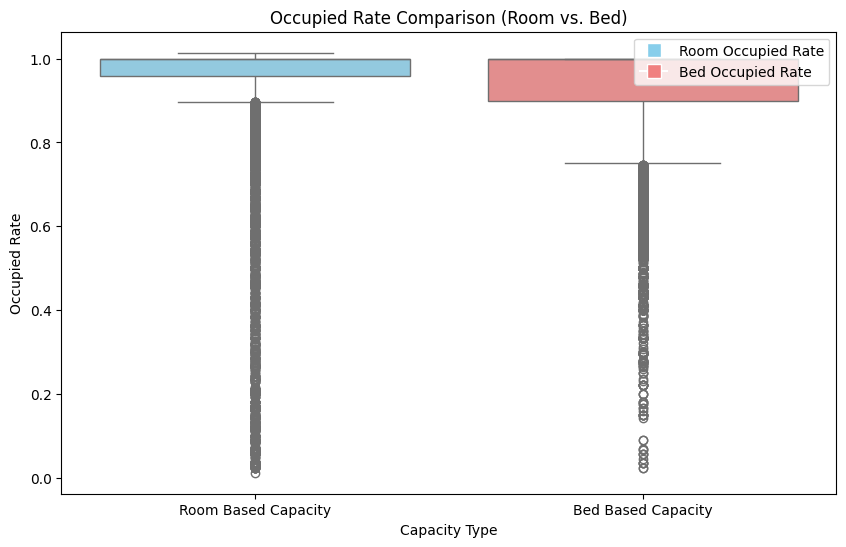

In [10]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create boxplots for 'ROOM_OCCUPIED_RATE' and 'BED_OCCUPIED_RATE' grouped by 'CAPACITY_TYPE'
# Use different colors for each boxplot
sns.boxplot(x='CAPACITY_TYPE', y='ROOM_OCCUPIED_RATE', data=df, color='skyblue')
sns.boxplot(x='CAPACITY_TYPE', y='BED_OCCUPIED_RATE', data=df, color='lightcoral')

# Manually add a legend
# Define legend labels and colors
legend_labels = ['Room Occupied Rate', 'Bed Occupied Rate']
legend_colors = ['skyblue', 'lightcoral']

# Create legend patches (markers) for each label and color
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]

# Add the legend to the upper right corner of the plot
plt.legend(legend_patches, legend_labels, loc='upper right')

# Set the plot title and axis labels
plt.title('Occupied Rate Comparison (Room vs. Bed)')
plt.xlabel('Capacity Type')
plt.ylabel('Occupied Rate')

# Show the plot
plt.show()

In [12]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(
    df['ROOM_OCCUPIED_RATE'],
    df['BED_OCCUPIED_RATE'],
    nan_policy='omit'  # This option omits NaNs from the analysis
)



# Interpretation for one-tailed test
one_tailed_p_value = p_value / 2  # Divide by two for one-tailed test
# Output the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value(One Sided):",one_tailed_p_value)

# Check the direction indicated by the t-statistic
if one_tailed_p_value < 0.05 and t_statistic > 0:
    print("There is a statistically significant difference, with the ROOM_OCCUPIED_RATE being higher than the BED_OCCUPIED_RATE.")
elif one_tailed_p_value < 0.05 and t_statistic < 0:
    print("There is a statistically significant difference, with the BED_OCCUPIED_RATE being higher than the ROOM_OCCUPIED_RATE.")
else:
    print("There is no statistically significant difference between ROOM_OCCUPIED_RATE and BED_OCCUPIED_RATE.")


T-statistic: 4.845858377006688
P-value(One Sided): 6.321780679079661e-07
There is a statistically significant difference, with the ROOM_OCCUPIED_RATE being higher than the BED_OCCUPIED_RATE.


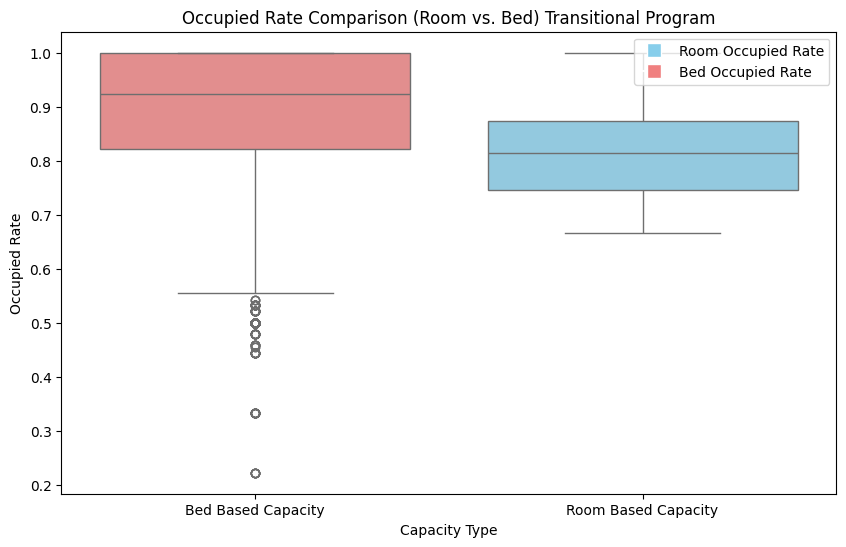

In [13]:
# Filter the DataFrame to include only rows with 'PROGRAM_MODEL' equal to 'Transitional'
program_model_T = df[df['PROGRAM_MODEL'] == 'Transitional']

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create boxplots for 'ROOM_OCCUPIED_RATE' and 'BED_OCCUPIED_RATE' grouped by 'CAPACITY_TYPE'
# Use different colors for each boxplot
sns.boxplot(x='CAPACITY_TYPE', y='ROOM_OCCUPIED_RATE', data=program_model_T, color='skyblue')
sns.boxplot(x='CAPACITY_TYPE', y='BED_OCCUPIED_RATE', data=program_model_T, color='lightcoral')

# Manually add a legend
# Define legend labels and colors
legend_labels = ['Room Occupied Rate', 'Bed Occupied Rate']
legend_colors = ['skyblue', 'lightcoral']

# Create legend patches (markers) for each label and color
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]

# Add the legend to the upper right corner of the plot
plt.legend(legend_patches, legend_labels, loc='upper right')

# Set the plot title and axis labels
plt.title('Occupied Rate Comparison (Room vs. Bed) Transitional Program')
plt.xlabel('Capacity Type')
plt.ylabel('Occupied Rate')

# Show the plot
plt.show()


In [15]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(
    program_model_T['ROOM_OCCUPIED_RATE'],
    program_model_T['BED_OCCUPIED_RATE'],
    nan_policy='omit'  # This option omits NaNs from the analysis
)



# Interpretation for one-tailed test
one_tailed_p_value = p_value / 2  # Divide by two for one-tailed test
# Output the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value(One Sided):",one_tailed_p_value)

# Check the direction indicated by the t-statistic
if one_tailed_p_value < 0.05 and t_statistic > 0:
    print("There is a statistically significant difference, with the ROOM_OCCUPIED_RATE being higher than the BED_OCCUPIED_RATE in Transitional Shelter.")
elif one_tailed_p_value < 0.05 and t_statistic < 0:
    print("There is a statistically significant difference, with the BED_OCCUPIED_RATE being higher than the ROOM_OCCUPIED_RATE in Transitional Shelter.")
else:
    print("There is no statistically significant difference between ROOM_OCCUPIED_RATE and BED_OCCUPIED_RATE.")


T-statistic: -12.624991306569669
P-value(One Sided): 1.512326360327876e-36
There is a statistically significant difference, with the BED_OCCUPIED_RATE being higher than the ROOM_OCCUPIED_RATE in Transitional Shelter.


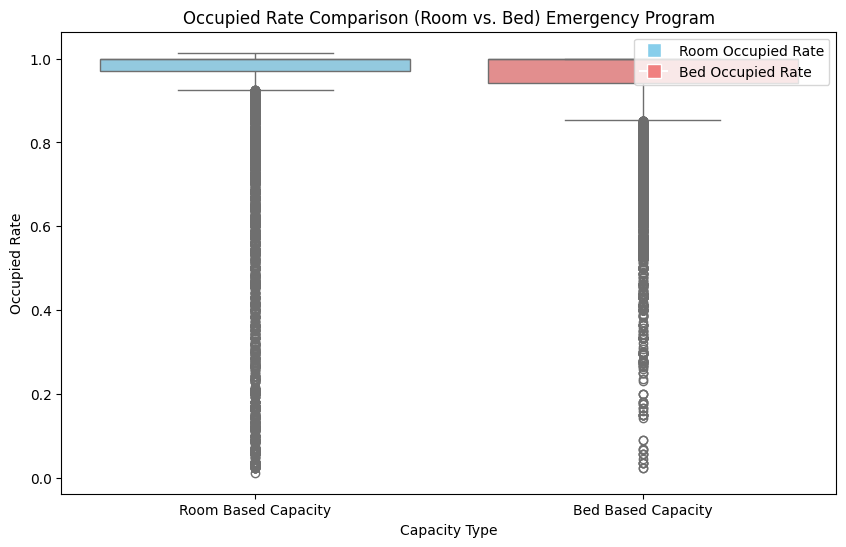

In [16]:
# Filter the DataFrame to include only rows with 'PROGRAM_MODEL' equal to 'Emergency'
program_model_E = df[df['PROGRAM_MODEL'] == 'Emergency']

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create boxplots for 'ROOM_OCCUPIED_RATE' and 'BED_OCCUPIED_RATE' grouped by 'CAPACITY_TYPE'
# Use different colors for each boxplot
sns.boxplot(x='CAPACITY_TYPE', y='ROOM_OCCUPIED_RATE', data=program_model_E, color='skyblue')
sns.boxplot(x='CAPACITY_TYPE', y='BED_OCCUPIED_RATE', data=program_model_E, color='lightcoral')

# Manually add a legend
# Define legend labels and colors
legend_labels = ['Room Occupied Rate', 'Bed Occupied Rate']
legend_colors = ['skyblue', 'lightcoral']

# Create legend patches (markers) for each label and color
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]

# Add the legend to the upper right corner of the plot
plt.legend(legend_patches, legend_labels, loc='upper right')

# Set the plot title and axis labels
plt.title('Occupied Rate Comparison (Room vs. Bed) Emergency Program')
plt.xlabel('Capacity Type')
plt.ylabel('Occupied Rate')

# Show the plot
plt.show()


In [18]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(
    program_model_E['ROOM_OCCUPIED_RATE'],
    program_model_E['BED_OCCUPIED_RATE'],
    nan_policy='omit'  # This option omits NaNs from the analysis
)



# Interpretation for one-tailed test
one_tailed_p_value = p_value / 2  # Divide by two for one-tailed test
# Output the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value(One Sided):",one_tailed_p_value)

# Check the direction indicated by the t-statistic
if one_tailed_p_value < 0.05 and t_statistic > 0:
    print("There is a statistically significant difference, with the ROOM_OCCUPIED_RATE being higher than the BED_OCCUPIED_RATE in Emergency Shelter.")
elif one_tailed_p_value < 0.05 and t_statistic < 0:
    print("There is a statistically significant difference, with the BED_OCCUPIED_RATE being higher than the ROOM_OCCUPIED_RATE in Emergency Shelter.")
else:
    print("There is no statistically significant difference between ROOM_OCCUPIED_RATE and BED_OCCUPIED_RATE.")


T-statistic: -3.546302026901181
P-value(One Sided): 0.00019555396659252583
There is a statistically significant difference, with the BED_OCCUPIED_RATE being higher than the ROOM_OCCUPIED_RATE in Emergency Shelter.
